## Load Twitter Sentiment Data

i. Load the twitter sentiment dataset, set the index, calculat engagement ratio and filter out stocks with no significant twitter activity.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
plt.style.use('ggplot')

data_folder = '/content/sentiment_data.csv'

sentiment_df = pd.read_csv(data_folder)

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

sentiment_df = sentiment_df.set_index(['date', 'symbol'])

sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']

sentiment_df = sentiment_df[(sentiment_df['twitterLikes']>20)&(sentiment_df['twitterComments']>10)]

sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[25375 rows x 6 columns]

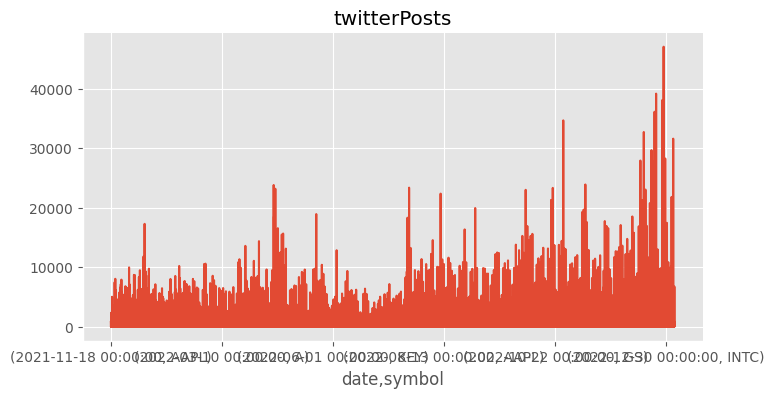

In [27]:
# @title twitterPosts

from matplotlib import pyplot as plt
sentiment_df['twitterPosts'].plot(kind='line', figsize=(8, 4), title='twitterPosts')
plt.gca().spines[['top', 'right']].set_visible(False)

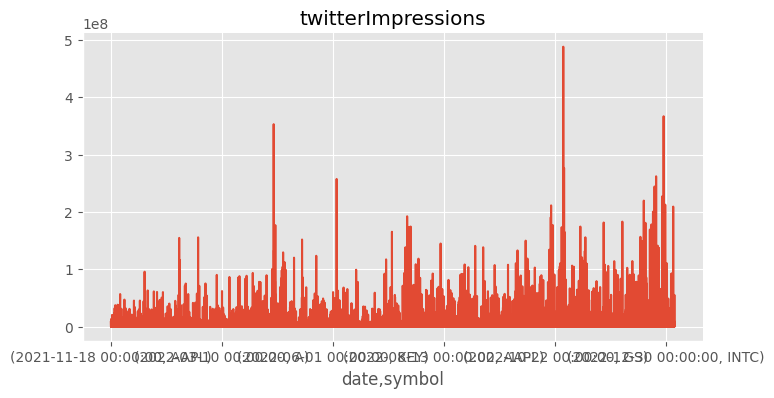

In [26]:
# @title twitterImpressions

from matplotlib import pyplot as plt
sentiment_df['twitterImpressions'].plot(kind='line', figsize=(8, 4), title='twitterImpressions')
plt.gca().spines[['top', 'right']].set_visible(False)

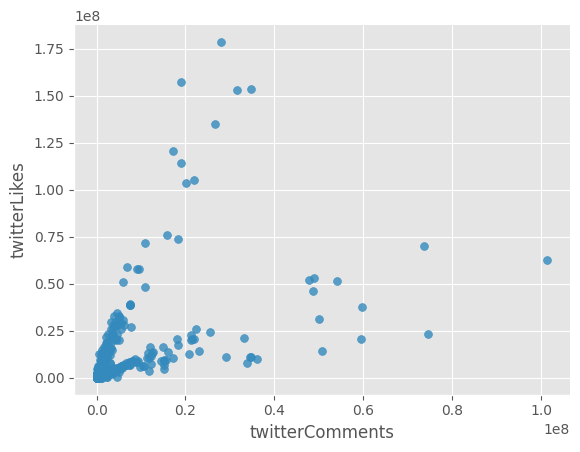

In [28]:
# @title twitterComments vs twitterLikes

from matplotlib import pyplot as plt
sentiment_df.plot(kind='scatter', x='twitterComments', y='twitterLikes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 2. Aggregate Monthly and calculate average sentiment for the month
Aggregate on a monthly level and calculate average monthly metric, for the one we choose.

In [7]:
aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])
                    [['engagement_ratio']].mean())

aggragated_df['rank'] = (aggragated_df.groupby(level=0)['engagement_ratio']
                         .transform(lambda x: x.rank(ascending=False)))

aggragated_df

<ipython-input-7-f461fc8698c8>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])


engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

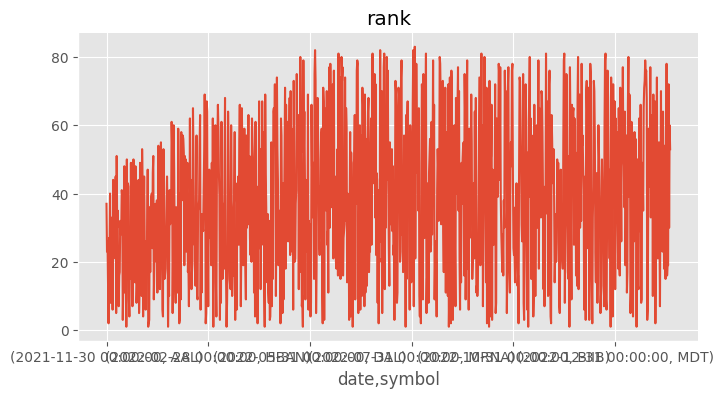

In [32]:
# @title rank

from matplotlib import pyplot as plt
aggragated_df['rank'].plot(kind='line', figsize=(8, 4), title='rank')
plt.gca().spines[['top', 'right']].set_visible(False)

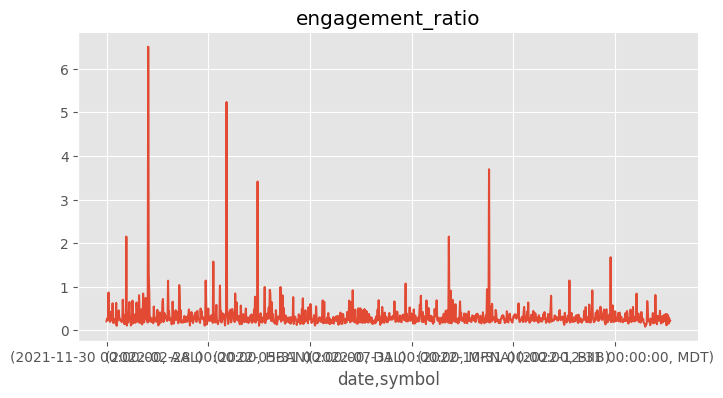

In [29]:
# @title engagement_ratio

from matplotlib import pyplot as plt
aggragated_df['engagement_ratio'].plot(kind='line', figsize=(8, 4), title='engagement_ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

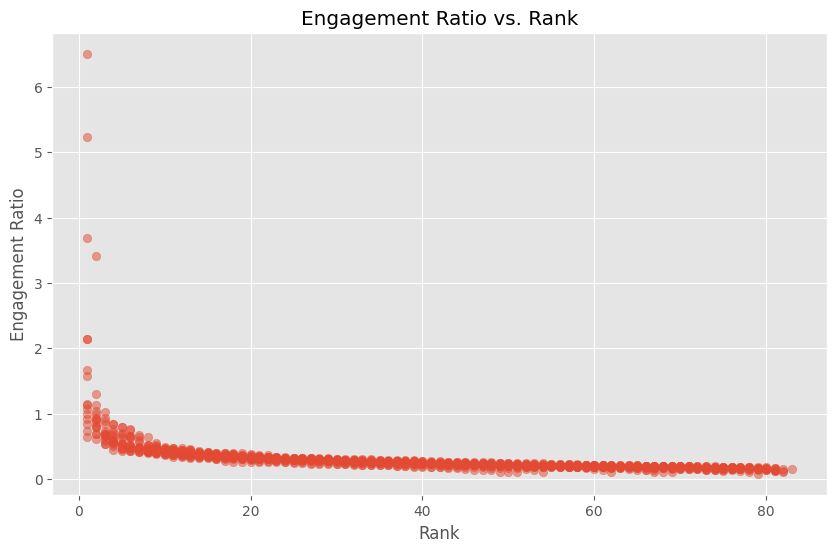

In [31]:
# @title Engagement Ratio vs. Rank

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(aggragated_df['rank'], aggragated_df['engagement_ratio'], alpha=0.5)
plt.title('Engagement Ratio vs. Rank')
plt.xlabel('Rank')
_ = plt.ylabel('Engagement Ratio')

## 3. Select Top 5 Stocks based on their cross-sectional ranking for each month
Select top 5 stocks by rank for each month and fix the date to start at beginning of next month.

In [8]:
filtered_df = aggragated_df[aggragated_df['rank']<6].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])

filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
2022-01-01 D               0.801994   5.0
           FCX             0.841220   4.0
           L               6.507246   1.0
           LUV             1.303215   2.0
           MA              0.883401   3.0
2022-02-01 AMD             0.715556   4.0
           D               1.136678   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.729063   3.0
2022-03-01 FCX             1.138332   2.0
           GILD            0.530886   5.0
           LUV             1.574377   1.0
           MRO             0.581748   4.0
           OXY             1.025579   3.0

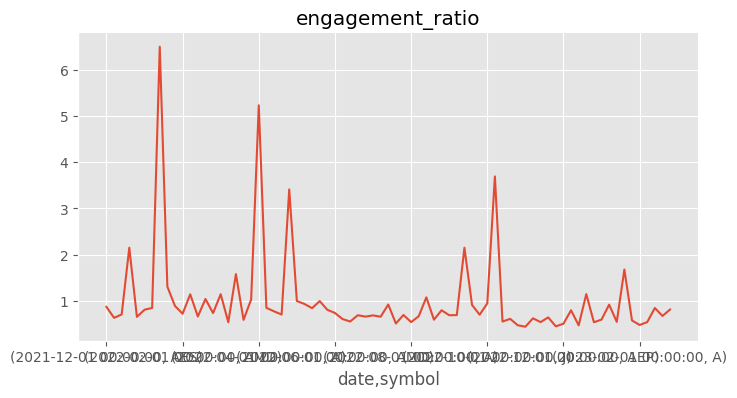

In [35]:
# @title engagement_ratio

from matplotlib import pyplot as plt
filtered_df['engagement_ratio'].plot(kind='line', figsize=(8, 4), title='engagement_ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

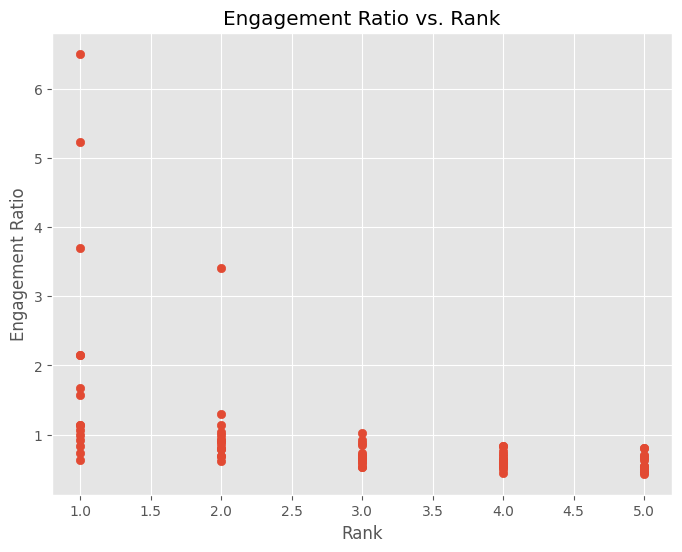

In [37]:
# @title Engagement Ratio vs. Rank

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'filtered_df'

plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['rank'], filtered_df['engagement_ratio'])
plt.title('Engagement Ratio vs. Rank')
plt.xlabel('Rank')
_ = plt.ylabel('Engagement Ratio')

## 4. Extract the stocks to form portfolios with at the start of each new month
Create a dictionary containing start of month and corresponded selected stocks.

In [9]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:

    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

## 5. Download fresh stock prices for only selected/shortlisted stocks

In [14]:
import yfinance as yf
import pandas as pd

# Extract the list of tickers from your sentiment data
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

# Try downloading data and handle any errors
valid_tickers = []
for ticker in stocks_list:
    try:
        # Attempt to download data for each ticker
        data = yf.download(ticker, start='2021-01-01', end='2023-03-01')
        if not data.empty:  # Check if the data is not empty
            valid_tickers.append(ticker)
        else:
            print(f"Ticker {ticker} returned no data.")
    except Exception as e:
        print(f"Error downloading data for ticker {ticker}: {e}")

# Now, download data for the valid tickers only
if valid_tickers:
    prices_df = yf.download(tickers=valid_tickers, start='2021-01-01', end='2023-03-01')
    print(f"Downloaded data for {len(valid_tickers)} valid tickers.")
else:
    print("No valid tickers found.")

# Check the first few rows of the downloaded data
print(prices_df.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Ticker ATVI returned no data.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Downloaded data for 84 valid tickers.
Price                       Adj Close                                 \
Ticker                              A    AAL         AAP        AAPL   
Date                                                                   
2021-01-04 00:00:00+00:00  115.980728  15.13  143.820755  126.544212   
2021-01-05 00:00:00+00:00  116.929001  15.43  143.665344  128.108780   
2021-01-06 00:00:00+00:00  120.135468  15.52  151.965164  123.796432   
2021-01-07 00:00:00+00:00  123.332191  15.38  153.263168  128.020737   
2021-01-08 00:00:00+00:00  124.212013  15.13  155.447800  129.125748   

Price                                                                   \
Ticker                          ABBV         ABT        AEP        AES   
Date                                                                     
2021-01-04 00:00:00+00:00  89.772621  101.576225  70.264366  20.518082   
2021-01-05 00:00:00+00:00  90.700928  102.832993  70.169586  21.206724   
2021-01-06 00:0

## 6. Calculate Portfolio Returns with monthly rebalancing


In [15]:
returns_df = np.log(prices_df['Adj Close']).diff().dropna()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():

    end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd()).strftime('%Y-%m-%d')

    cols = fixed_dates[start_date]

    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')

    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

portfolio_df

,portfolio_return
Date,
2021-12-01 00:00:00+00:00,-0.016417
2021-12-02 00:00:00+00:00,0.024872
2021-12-03 00:00:00+00:00,-0.007711
2021-12-06 00:00:00+00:00,0.023925
2021-12-07 00:00:00+00:00,0.030547
...,...
2023-02-22 00:00:00+00:00,-0.007870
2023-02-23 00:00:00+00:00,-0.007323
2023-02-24 00:00:00+00:00,-0.009463


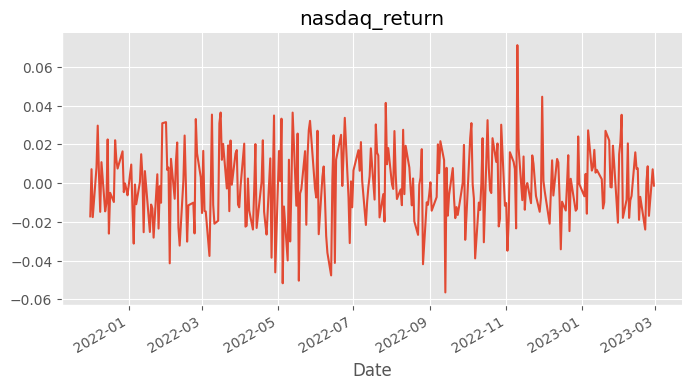

In [38]:
# @title nasdaq_return

from matplotlib import pyplot as plt
portfolio_df['nasdaq_return'].plot(kind='line', figsize=(8, 4), title='nasdaq_return')
plt.gca().spines[['top', 'right']].set_visible(False)

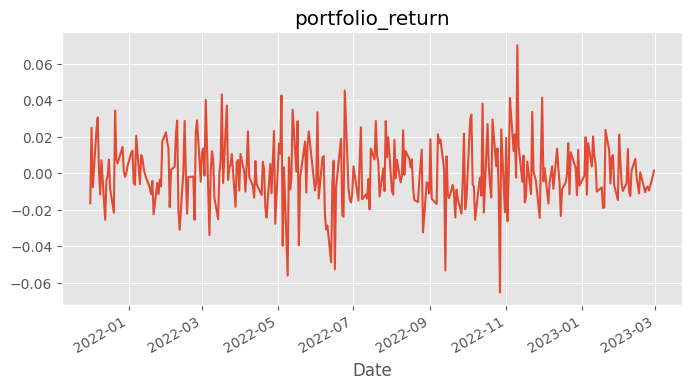

In [36]:
# @title portfolio_return

from matplotlib import pyplot as plt
portfolio_df['portfolio_return'].plot(kind='line', figsize=(8, 4), title='portfolio_return')
plt.gca().spines[['top', 'right']].set_visible(False)

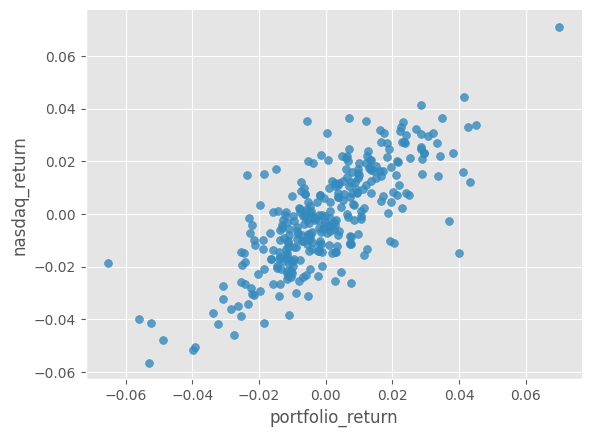

In [39]:
# @title portfolio_return vs nasdaq_return

from matplotlib import pyplot as plt
portfolio_df.plot(kind='scatter', x='portfolio_return', y='nasdaq_return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 7. Download NASDAQ/QQQ prices and calculate returns to compare to our strategy


In [21]:
import numpy as np
import yfinance as yf

# Download QQQ data
qqq_df = yf.download(tickers='QQQ', start='2021-01-01', end='2023-03-01')

# Calculate the log returns of the adjusted close prices
qqq_ret = np.log(qqq_df['Adj Close']).diff()

# Ensure qqq_ret is a Series before converting to DataFrame
# If qqq_ret is already a DataFrame
qqq_ret.columns = ['nasdaq_return']

# Merge the returns with your existing portfolio dataframe
portfolio_df = portfolio_df.merge(qqq_ret, left_index=True, right_index=True)

# Display the resulting portfolio dataframe
portfolio_df


[*********************100%***********************]  1 of 1 completed


,portfolio_return,nasdaq_return
Date,,
2021-12-01 00:00:00+00:00,-0.016417,-0.017159
2021-12-02 00:00:00+00:00,0.024872,0.007181
2021-12-03 00:00:00+00:00,-0.007711,-0.017542
2021-12-06 00:00:00+00:00,0.023925,0.007981
2021-12-07 00:00:00+00:00,0.030547,0.029669
...,...,...
2023-02-22 00:00:00+00:00,-0.007870,0.000748
2023-02-23 00:00:00+00:00,-0.007323,0.008696
2023-02-24 00:00:00+00:00,-0.009463,-0.016886


from matplotlib import pyplot as plt
portfolio_df['portfolio_return'].plot(kind='hist', bins=20, title='portfolio_return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
portfolio_df['nasdaq_return'].plot(kind='hist', bins=20, title='nasdaq_return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
portfolio_df.plot(kind='scatter', x='portfolio_return', y='nasdaq_return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
portfolio_df['portfolio_return'].plot(kind='line', figsize=(8, 4), title='portfolio_return')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
portfolio_df['nasdaq_return'].plot(kind='line', figsize=(8, 4), title='nasdaq_return')
plt.gca().spines[['top', 'right']].set_visible(False)

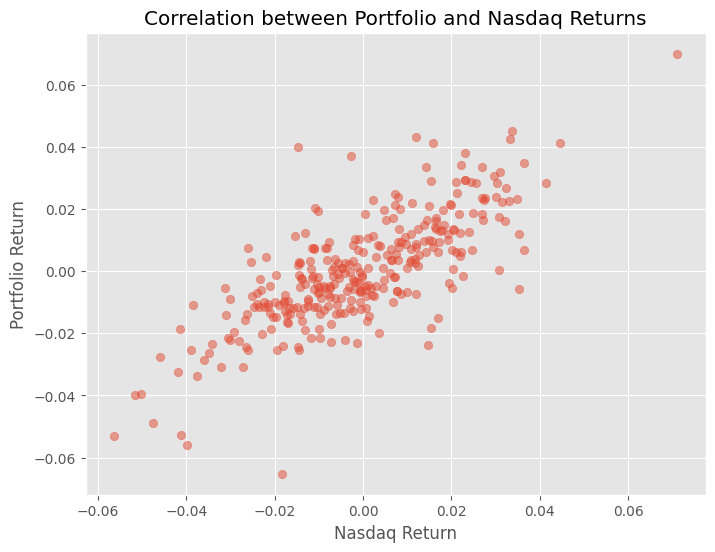

In [40]:
# @title Correlation between Portfolio and Nasdaq Returns

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(portfolio_df['nasdaq_return'], portfolio_df['portfolio_return'], alpha=0.5)
plt.xlabel('Nasdaq Return')
plt.ylabel('Portfolio Return')
_ = plt.title('Correlation between Portfolio and Nasdaq Returns')

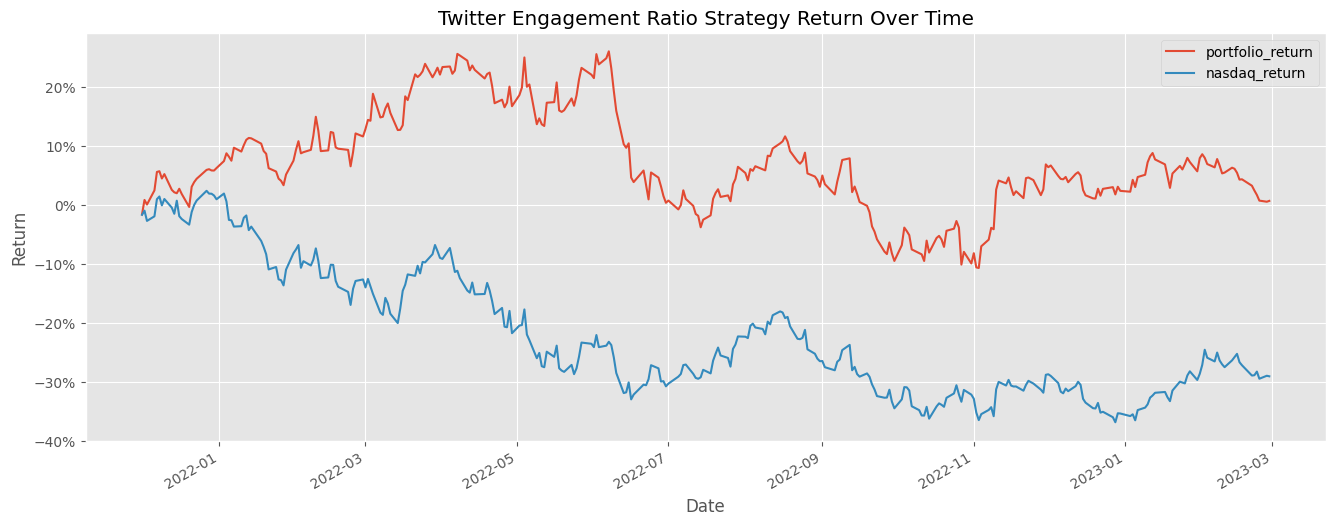

In [24]:
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.pyplot as plt

# Assuming portfolio_df is already defined

# Calculate cumulative return
portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

# Plot cumulative return
portfolios_cumulative_return.plot(figsize=(16, 6))

plt.title('Twitter Engagement Ratio Strategy Return Over Time')

# Set y-axis labels as percentage format
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')
plt.show()
